# HLMA 408: Modèle linéaire

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn import linear_model
import seaborn as sns
from os import mkdir, path
from sklearn import preprocessing
from random import shuffle, seed
import matplotlib.animation as animation
%matplotlib inline
from IPython.display import HTML

# Plot initialization


In [2]:
dirname = "../prebuiltimages/"
if not path.exists(dirname):
    mkdir(dirname)

imageformat = '.pdf'
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (10, 7),
          'font.family' : 'sans-serif'}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.axes_style()
sns.set_style({'legend.frameon': True})
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]
my_blue = color_blind_list[0]

plt.close("all")

# Saving display function

In [3]:
saving = True


def my_saving_display(fig, dirname, filename, imageformat):
    """"Saving with personal function."""
    filename = filename.replace('.', 'pt')  # remove "." to avoid floats issues
    if saving is True:
        dirname + filename + imageformat
        image_name = dirname + filename + imageformat
        fig.savefig(image_name)

# Load data

In [4]:
# Original url:
url = 'https://forge.scilab.org/index.php/p/rdataset/source/file/master/csv/datasets/cars.csv'
# Alternative url:
# url = 'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/cars.csv'
dat = pd.read_csv(url)
dat = dat.drop(columns='Unnamed: 0')
dat.columns=['Vitesse (mph)','Distance (ft)']

y = dat['Distance (ft)']
X = dat[['Vitesse (mph)']]  # Beware dat['speed'].shape = (50,), issue with sklearn API
n_sample, _ = X.shape


# Data only

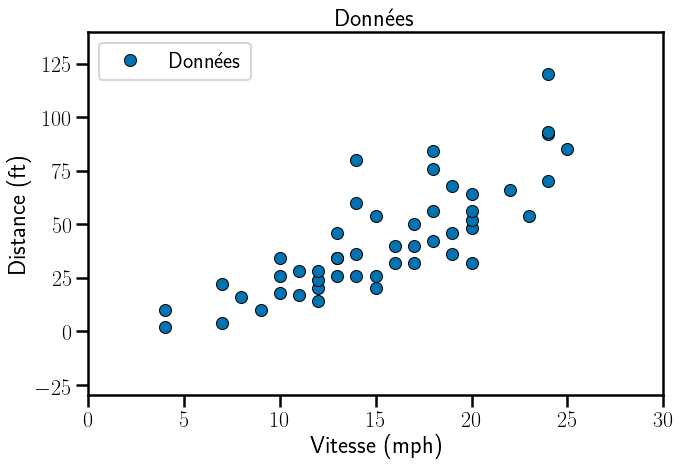

In [5]:
xlabels = dat.columns[0]
ylabels = dat.columns[1]

fig1 = plt.figure(figsize=(10, 7))
plt.xlabel(xlabels)
plt.ylabel(ylabels)
plt.title(r'Donn\'ees')
plt.plot(X, y, 'o', label=r'Donn\'ees', markeredgecolor='k', markeredgewidth=1)
axes = plt.gca()
xmin_normal=0
xmax_normal=30
ymin_normal=-30
ymax_normal=140


plt.xlim(xmin=xmin_normal, xmax=xmax_normal)
plt.ylim(ymin=ymin_normal, ymax=ymax_normal)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "cars_data_plot", imageformat)

# Data and OLS estimator

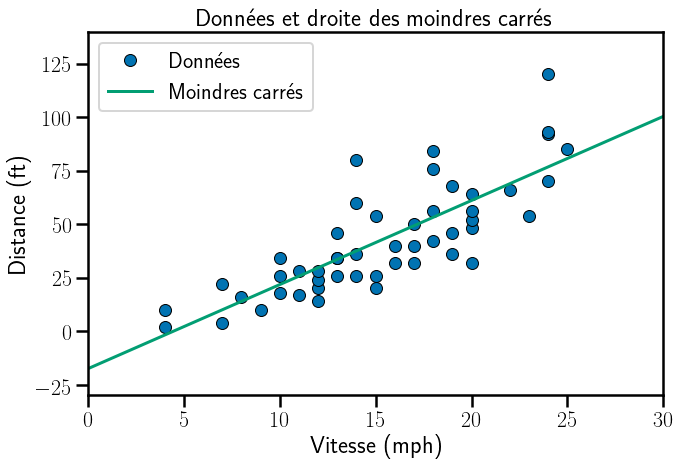

In [6]:
# Fit regression model (with statsmodels)
sm_linmod = sm.OLS(y, X).fit()

# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(X, y)

# Fit regression model without intercept (with sklearn)
skl_linmod_no_inter = linear_model.LinearRegression(fit_intercept=False)
skl_linmod_no_inter.fit(X, y)

fig = plt.figure(figsize=(10, 7))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)
plt.plot(X, y, 'o', label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)
X_to_predict = np.linspace(0.0, 30.0, num=50).reshape(50, 1)
X_to_predict = pd.DataFrame(X_to_predict, columns=['Vitesse (mph)'])


plt.xlim(xmin=xmin_normal, xmax=xmax_normal)
plt.ylim(ymin=ymin_normal, ymax=ymax_normal)

plt.plot(X_to_predict, skl_linmod.predict(X_to_predict),
         linewidth=3, color=my_orange, label=r"Moindres carr\'es")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title(r"Donn\'ees et droite des moindres carr\'es")
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_regression",
                  imageformat)

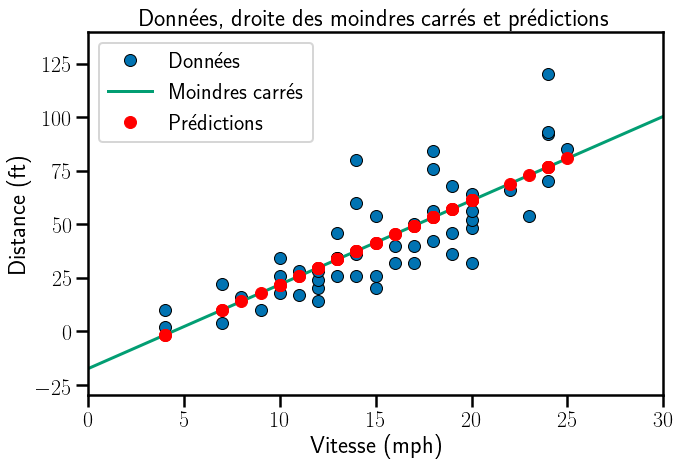

In [7]:
# # Fit regression model (with statsmodels)
# sm_linmod = sm.OLS(y, X).fit()

# # Fit regression model (with sklearn)
# skl_linmod = linear_model.LinearRegression()
# skl_linmod.fit(X, y)

# # Fit regression model without intercept (with sklearn)
# skl_linmod_no_inter = linear_model.LinearRegression(fit_intercept=False)
# skl_linmod_no_inter.fit(X, y)

fig = plt.figure(figsize=(10, 7))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)
plt.plot(X, y, 'o', label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)
X_to_predict = np.linspace(0.0, 30.0, num=50).reshape(50, 1)
X_to_predict = pd.DataFrame(X_to_predict, columns=['Vitesse (mph)'])


plt.xlim(xmin=xmin_normal, xmax=xmax_normal)
plt.ylim(ymin=ymin_normal, ymax=ymax_normal)

plt.plot(X_to_predict, skl_linmod.predict(X_to_predict),
         linewidth=3, color=my_orange, label=r"Moindres carr\'es")
plt.plot(X, skl_linmod.predict(X), 'o', label=r"Pr\'edictions",
         color='r', markeredgewidth=1)
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title(r"Donn\'ees, droite des moindres carr\'es et pr\'edictions")
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_regression_with_pred",
                  imageformat)

# Residuals

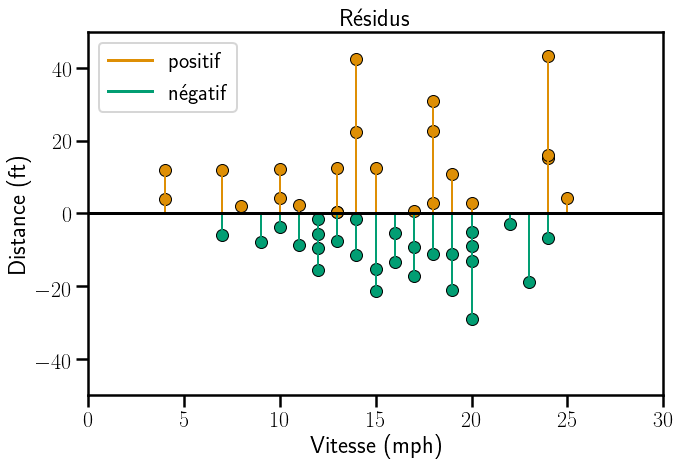

In [8]:
residual = y - skl_linmod.predict(X)

fig = plt.figure(figsize=(10, 7))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-50, ymax=50)
plt.xlabel(xlabels)
plt.ylabel(ylabels)

legend_names = [r'positif', r'n\'egatif']
plots = []
proxies = []

# Positive residuals
positive_res = residual > 0
markerline, stemlines, baseline = plt.stem(X[positive_res],
                                           residual[positive_res])
plots.append((markerline, stemlines, baseline))
plt.setp(stemlines, linewidth=2, color=my_green)   # set stems colors
plt.setp(markerline, 'markerfacecolor', my_green, markeredgecolor='k',
         markeredgewidth=1)    # make points green
h, = plt.plot(1, 1, color=my_green)
proxies.append(h)
plt.legend(proxies, legend_names, numpoints=1, loc=2)

# Negative residuals
negative_res = residual <= 0
markerline, stemlines, baseline = plt.stem(X[negative_res],
                                           residual[negative_res])
plots.append((markerline, stemlines, baseline))
plt.setp(stemlines, linewidth=2, color=my_orange)   # set stems colors
plt.setp(markerline, 'markerfacecolor', my_orange, markeredgecolor='k',
         markeredgewidth=1)    # make points orange

plt.title(r'R\'esidus')
plt.axhline(y=0, ls='-', color='k')

h, = plt.plot(1, 1, color=my_orange)
proxies.append(h)
plt.legend(proxies, legend_names, numpoints=1, loc=2)


plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_regression_residual",
                  imageformat)

In [9]:
residual
print(skl_linmod.coef_)
print(skl_linmod.intercept_)
print(np.sum(residual ** 2)/ (n_sample - 2))

[3.93240876]
-17.579094890510973
236.5316885644769


$\hat{\sigma}$


In [10]:
sigmahat=np.sqrt(np.sum(residual ** 2)/ (n_sample - 2))
print(sigmahat)
print(skl_linmod.intercept_)
print('prediction')
print(skl_linmod.predict([[5]]))
print(np.var(X))
print('sigma1_sqr')
sigma1_sqr = sigmahat**2/(n_sample*np.var(X))
print(sigma1_sqr)
print('T1')
print(skl_linmod.coef_ / np.sqrt(sigma1_sqr))
from scipy.stats import t 
t.ppf(0.975,n_sample-2)

15.379586748819907
-17.579094890510973
prediction
[2.08294891]
Vitesse (mph)    27.4
dtype: float64
sigma1_sqr
Vitesse (mph)    0.172651
dtype: float64
T1
Vitesse (mph)    9.46399
dtype: float64


2.0106347546964454

In [11]:
-17.58 + 3.93 * 5

2.070000000000004

In [12]:
alpha = 0.05
t_alpha = t.ppf(1 - alpha / 2, n_sample - 2)
residual = y - skl_linmod.predict(X)
sigmahat = np.sqrt(np.sum(residual ** 2) / (n_sample - 2))
sigma1_hat = sigmahat**2 / (np.var(X)  * n_sample)
IC =skl_linmod.coef_ - t_alpha * sigma1_hat, skl_linmod.coef_ + t_alpha * sigma1_hat
IC_fin = np.array(IC, dtype=pd.Series).squeeze()
print(IC_fin)

[3.58527092436878 4.279546593879398]


In [13]:
def compute_ic(X, y, alpha = 0.05):
    n_sample, _ = X.shape
    t_alpha = t.ppf(1 - alpha / 2, n_sample - 2)
    residual = y - skl_linmod.predict(X)
    sigmahat = np.sqrt(np.sum(residual ** 2) / (n_sample - 2))
    sigma1_hat = sigmahat**2 / (np.var(X)  * n_sample)
    IC =skl_linmod.coef_ - t_alpha * sigma1_hat, skl_linmod.coef_ + t_alpha * sigma1_hat
    IC_fin = np.array(IC, dtype=pd.Series).squeeze()
    return IC_fin

In [14]:
def compute_ic_pred(X, y, x, alpha=0.05):
    n_sample, _ = X.shape
    t_alpha = t.ppf(1 - alpha / 2, n_sample - 2)
    print(t_alpha)
    residual = y - skl_linmod.predict(X)
    sigmahat = np.sqrt(np.sum(residual ** 2) / (n_sample - 2))
    meanX = (np.array(X.mean(axis=0), dtype=pd.Series).squeeze())
    varX = (np.array(X.var(axis=0), dtype=pd.Series).squeeze())
    sigmapred_hat = (sigmahat**2 * (varX + (x - meanX)**2) / (varX * n_sample))
    sigmapred_hat = sigmapred_hat.squeeze() ** 0.5
    IC_down = skl_linmod.predict(x) - t_alpha * sigmapred_hat
    IC_up = skl_linmod.predict(x) + t_alpha * sigmapred_hat
    return IC_down, IC_up

In [15]:
alpha=0.05
IC_down1, IC_up1 = compute_ic_pred(X, y, np.array([5]).reshape(-1,1), alpha=0.05)
print(IC_down1, IC_up1)


2.0106347546964454
[-7.56622811] [11.73212592]


In [16]:
IC_down, IC_up = compute_ic_pred(X, y, X_to_predict, alpha=alpha)

2.0106347546964454


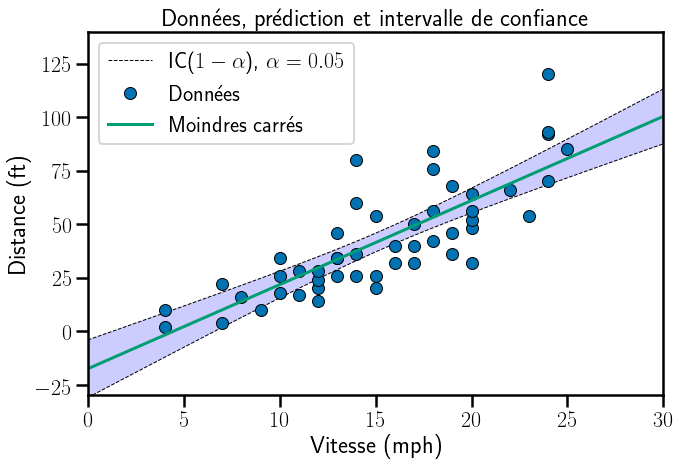

In [17]:
fig = plt.figure(figsize=(10, 7))
plt.xlabel(xlabels)
plt.ylabel(ylabels)

plt.plot(X_to_predict, IC_down,'--',color='k',  linewidth=1,
        label="IC($1-\\alpha$), $\\alpha={}$".format(alpha))
plt.plot(X_to_predict, IC_up,'--',color='k', linewidth=1, label='')
plt.plot(X, y, 'o', label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict, skl_linmod.predict(X_to_predict), linewidth=3,
         color=my_orange,
         label=r"Moindres carr\'es")
ax = plt.gca()

ax.fill_between(X_to_predict.squeeze(),
                IC_up.astype(float),
                IC_down.astype(float), facecolor='blue', alpha=.2)

plt.xlim(xmin=xmin_normal, xmax=xmax_normal)
plt.ylim(ymin=ymin_normal, ymax=ymax_normal)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer legend
plt.title(r'Donn\'ees, pr\'ediction et intervalle de confiance')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_IC_plot_regression",
                  imageformat)

In [18]:
# predictions:
x_to_pred = np.array([15])
print(skl_linmod.predict(x_to_pred.reshape(-1,1)))

x_to_pred = np.array([5])
print(skl_linmod.predict(x_to_pred.reshape(-1,1)))

[41.4070365]
[2.08294891]


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
dat_r = pd.read_csv(url)
dat_r = dat_r.drop(columns='Unnamed: 0')
dat_r.columns=['Vitesse','Distance']

# Stastsmodel

In [20]:
# Xtilde = sm.add_constant(X)
# results = sm.OLS(y, X).fit()
# results = smf.ols('Distance~ Vitesse', data=dat).fit()

# Histogram residuals


/home/jo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


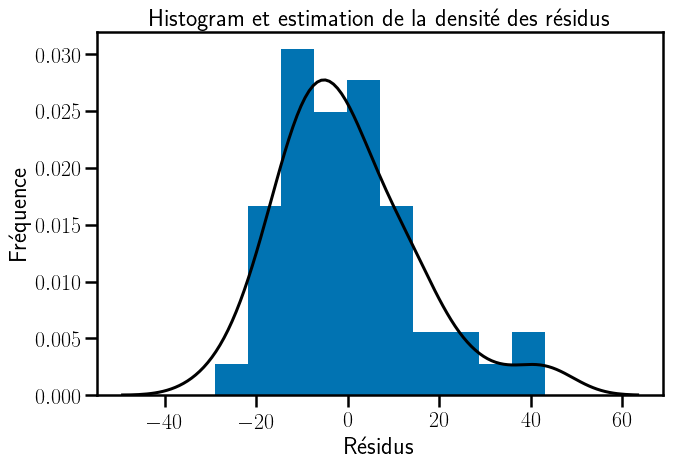

In [21]:
fig = plt.figure(figsize=(10, 7))
plt.hist(residual, bins=10, normed=True, align='mid')
sns.kdeplot(residual,color='k')
plt.title(r'Histogram et estimation de la densit\'e des r\'esidus ')
ax = plt.gca()
ax.legend_ = None
plt.xlabel(r'R\'esidus')
plt.ylabel(r'Fr\'equence')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_residual_hist", imageformat)

# OLS with intercept


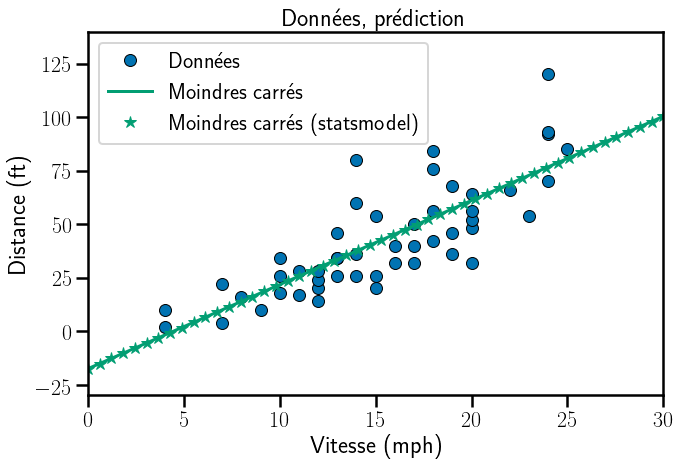

In [22]:
X_with_cst = sm.add_constant(X)
sm_linmod = sm.OLS(y, X_with_cst).fit()

fig = plt.figure(figsize=(10, 7))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)

X_to_predict_with_cst = sm.add_constant(X_to_predict)


plt.plot(X, y, 'o', label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict, skl_linmod.predict(X_to_predict), linewidth=3,color=my_orange,
         label=r"Moindres carr\'es")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer legend
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title(r'Donn\'ees, pr\'ediction')


plt.xlim(xmin=xmin_normal, xmax=xmax_normal)
plt.ylim(ymin=ymin_normal, ymax=ymax_normal)

plt.tight_layout()

# my_saving_display(fig, dirname, "cars_data_plot_regression", imageformat)
ax = plt.gca()


ax.plot(X_to_predict, sm_linmod.predict(X_to_predict_with_cst), '*', color=my_orange,
         linewidth=3, label=r"Moindres carr\'es (statsmodel)")

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer legend
plt.tight_layout()
plt.show()


my_saving_display(fig, dirname, "cars_data_plot_regression_statsmodel", imageformat)

# Second order with intercept = FALSE: physics tell you it is zero !


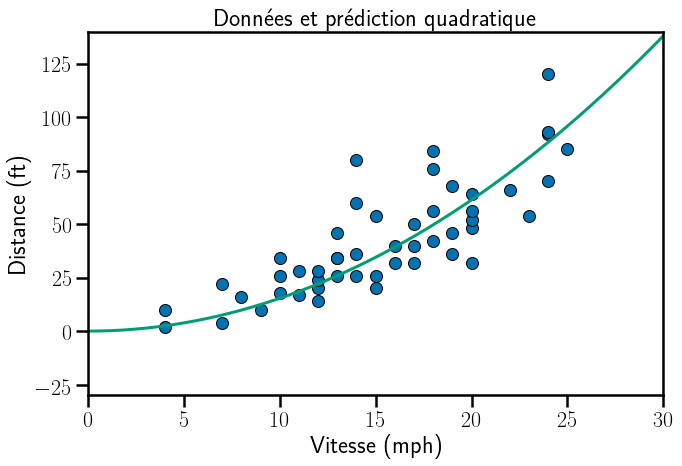

In [23]:
X_new = np.reshape(X['Vitesse (mph)'].values ** 2, (-1, 1))
skl_linmod_quad = linear_model.LinearRegression(fit_intercept=False)
skl_linmod_quad.fit(X_new, y)

fig = plt.figure(figsize=(10, 7))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)

plt.plot(X, y, 'o', label=r"Pr\'ediction quadratique",
         markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict, skl_linmod_quad.predict(
    X_to_predict ** 2), color=my_orange)
plt.xlabel(xlabels),
plt.ylabel(ylabels)

plt.xlim(xmin=xmin_normal, xmax=xmax_normal)
plt.ylim(ymin=ymin_normal, ymax=ymax_normal)

plt.title(r'Donn\'ees et pr\'ediction quadratique')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_quad", imageformat)

# Histogram residuals

/home/jo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


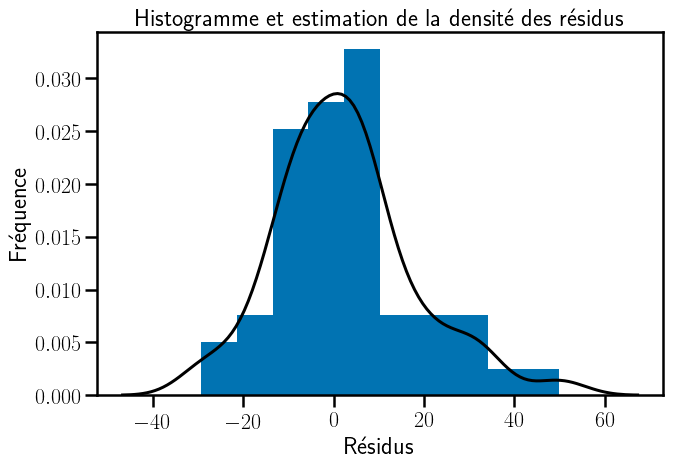

In [24]:
residual_quad = y - skl_linmod_quad.predict(X_new)

fig = plt.figure(figsize=(10, 7))
plt.hist(residual_quad, bins=10, normed=True, align='mid')
sns.kdeplot(residual_quad,color='k')
plt.title(r'Histogramme et estimation de la densit\'e des r\'esidus ')
ax = plt.gca()
ax.legend_ = None
plt.xlabel(r'R\'esidus')
plt.ylabel(r'Fr\'equence')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname, "cars_quad_residual_hist", imageformat)


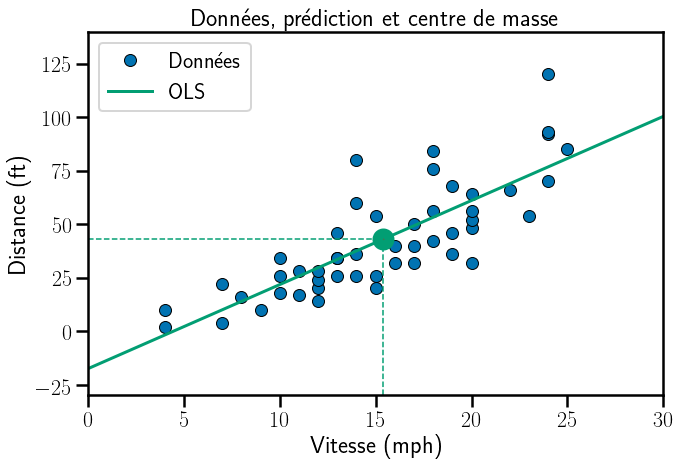

In [25]:
# With intercept and center of mass displayed

fig = plt.figure(figsize=(10, 7))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)

plt.plot(X, y, 'o', label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict, skl_linmod.predict(X_to_predict),
         color=my_orange, linewidth=3, label="OLS")
plt.plot(np.mean(X), np.mean(y), 'or', markeredgewidth=10,
         markeredgecolor=my_orange)
plt.plot([np.mean(X), np.mean(X)], [-30, np.mean(y)],
         color=my_orange, linewidth=1.5, linestyle="--")
plt.plot([0, np.mean(X)], [np.mean(y), np.mean(y)], color=my_orange,
         linewidth=1.5, linestyle="--")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)

plt.xlim(xmin=xmin_normal, xmax=xmax_normal)
plt.ylim(ymin=ymin_normal, ymax=ymax_normal)

plt.title(r'Donn\'ees, pr\'ediction et centre de masse')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname,
                  "cars_data_plot_regression_intercept_gravity", imageformat)

# With intercept and center of mass displayed + recentering

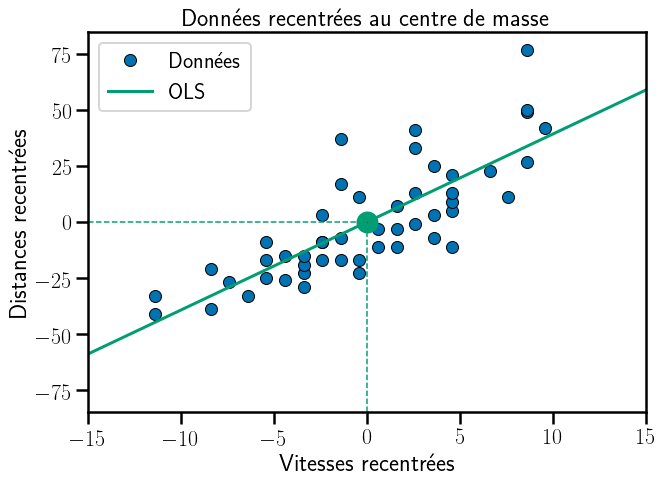

In [26]:
Xprime = X - np.mean(X)
yprime = y - np.mean(y)
fig = plt.figure(figsize=(10, 7))
plt.xlim(xmin=-15, xmax=15)
plt.ylim(ymin=-85, ymax=85)
plt.plot(X - np.mean(X), y - np.mean(y), 'o', label=r"Donn\'ees",
         markeredgecolor='k', markeredgewidth=1)
skl_linmod.fit(Xprime, yprime)
skl_linmod.predict(X_to_predict)
plt.plot(X_to_predict - 15, skl_linmod.predict(X_to_predict - 15),
         color=my_orange, linewidth=3, label="OLS")
plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
plt.plot([0, 0], [-85, 0], color=my_orange, linewidth=1.5,
         linestyle="--")
plt.plot([-15, 0], [0, 0], color=my_orange, linewidth=1.5,
         linestyle="--")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
xlabels = r"Vitesses recentr\'ees"
ylabels = r"Distances recentr\'ees"
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title(r"Donn\'ees recentr\'ees au centre de masse")
plt.show()

# Recentered to center of mass + slopes

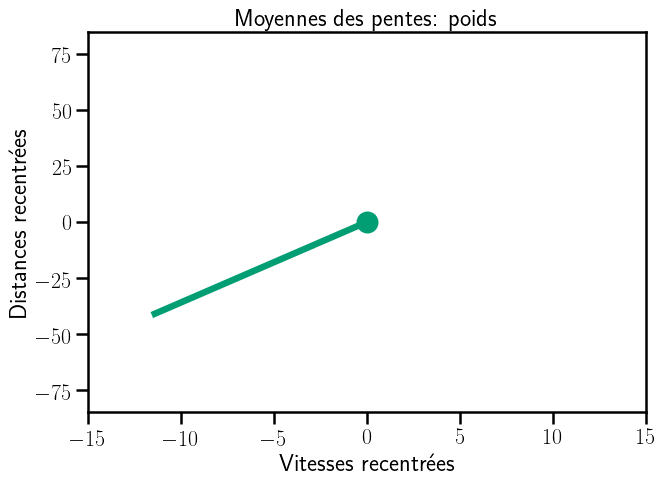

In [27]:

fig = plt.figure(figsize=(10, 7))
plt.xlim(xmin=-15, xmax=15)
plt.ylim(ymin=-85, ymax=85)
plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Moyennes des pentes: poids')
ax = plt.gca()
for i in range(n_sample):
    ax.plot([Xprime.loc[i, 'Vitesse (mph)'], 0], [yprime.loc[i], 0], color=my_orange,
             linewidth=(Xprime.loc[i, 'Vitesse (mph)']) ** 2 / 20.,
             linestyle="-")
    plt.pause(0.1)
    ax.plot(Xprime.loc[i, 'Vitesse (mph)'], yprime.loc[i], 'o',
             markeredgecolor='k', markeredgewidth=1, color=my_blue,
             markersize=(Xprime.loc[i, 'Vitesse (mph)']) ** 2 / 10.)
plt.show()

my_saving_display(fig, dirname,
                  "cars_data_plot_regression_gravity_weights", imageformat)

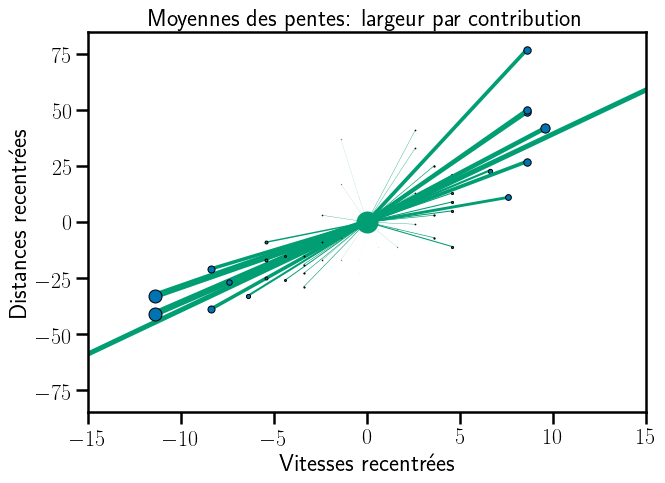

In [28]:
fig = plt.figure(figsize=(10, 7))
plt.xlim(xmin=-15, xmax=15)
plt.ylim(ymin=-85, ymax=85)
plt.plot(X_to_predict - 15, skl_linmod.predict(X_to_predict - 15),
         color=my_orange, linewidth=5, label="OLS")
plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
for i in range(n_sample):
    plt.plot([Xprime.loc[i, 'Vitesse (mph)'], 0], [yprime.loc[i], 0], color=my_orange,
             linewidth=(Xprime.loc[i, 'Vitesse (mph)']) ** 2 / 20.,
             linestyle="-")
    # plt.pause(0.01)
    plt.plot(Xprime.loc[i, 'Vitesse (mph)'], yprime.loc[i], 'o',
             markeredgecolor='k', markeredgewidth=1, color=my_blue,
             markersize=(Xprime.loc[i, 'Vitesse (mph)']) ** 2 / 10.)

plt.xlabel(xlabels),
plt.ylabel(ylabels)
plt.title('Moyennes des pentes: largeur par contribution')
plt.show()

my_saving_display(fig, dirname,
                  "cars_data_plot_regression_gravity_weights_OLS", imageformat)

# Start Movie

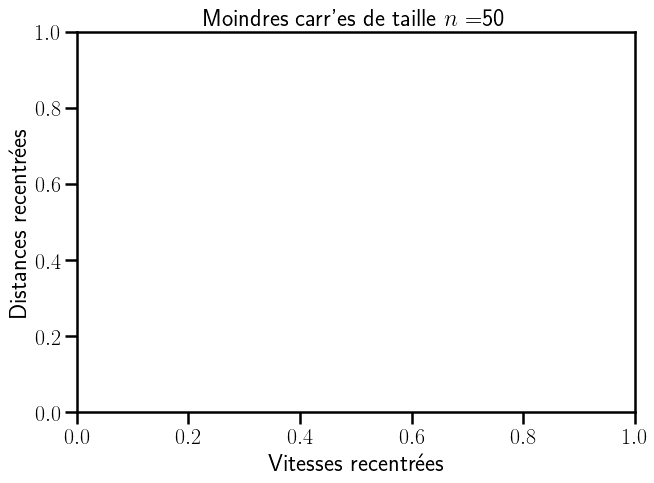

In [29]:
seed(1)
rnd_index = list(range(n_sample))
shuffle(rnd_index)

fig, ax = plt.subplots(figsize=(10, 7))

# plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
# xlabels = 'Recentered speed'
# ylabels = 'Recentered distance'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title(u'Moindres carr\'es de taille ' + '$ n=$' + str(i + 1))
plt.show()

# Line and points creation
line, = ax.plot([],[], color=my_orange, linewidth=5, label="OLS")
point, = ax.plot([], [], 'o', label=r"Donn\'ees", markeredgecolor='k',
             markeredgewidth=1, color=my_blue)


# Windows size
ax.set_xlim([-15, 15])
ax.set_ylim([-85, 85])

# Create function for each frame
def animate(i):
    y_small = yprime[rnd_index[0:i + 1]]
    X_small = Xprime.iloc[rnd_index[0:i + 1]]
    skl_linmod.fit(X_small, y_small)
    point.set_data(X_small, y_small)    
    line.set_data(X_to_predict - 15, skl_linmod.predict(X_to_predict - 15))
    ax.plot(0, 0, 'o', markeredgewidth=10, markeredgecolor=my_orange)
    ax.set_title(r'Moindres carr\'es de taille ' + '$ n=$' + str(i + 1))
 
    return line, point

# Save animation in ani
ani = animation.FuncAnimation(fig=fig, func=animate, frames=50, interval=100, blit=True)
plt.show()

In [30]:
HTML(ani.to_html5_video())  # Need ffmpeg installed on your machine

# Check the influence of the extreme points (to compare with 3.93)

In [31]:
print("Slopes estimates:")
print("index", 'speed^2', 'speed', 'time', 'leverage' )

for i in range(len(y)):
    if (Xprime.loc[i, 'Vitesse (mph)']) ** 2 > 50:
        print(i, (Xprime.loc[i, 'Vitesse (mph)']) ** 2, Xprime.loc[i, 'Vitesse (mph)'], yprime.loc[i],
              yprime.loc[i] / Xprime.loc[i, 'Vitesse (mph)'])
        print("\t")

Slopes estimates:
index speed^2 speed time leverage
0 129.96 -11.4 -40.98 3.5947368421052626
	
1 129.96 -11.4 -32.98 2.8929824561403503
	
2 70.56 -8.4 -38.98 4.64047619047619
	
3 70.56 -8.4 -20.979999999999997 2.497619047619047
	
4 54.760000000000005 -7.4 -26.979999999999997 3.6459459459459453
	
44 57.76 7.6 11.020000000000003 1.4500000000000004
	
45 73.96 8.6 27.020000000000003 3.1418604651162796
	
46 73.96 8.6 49.02 5.7
	
47 73.96 8.6 50.02 5.816279069767442
	
48 73.96 8.6 77.02000000000001 8.955813953488374
	
49 92.16 9.6 42.02 4.377083333333334
	


# With intercept and center of mass + recentering + rescaling

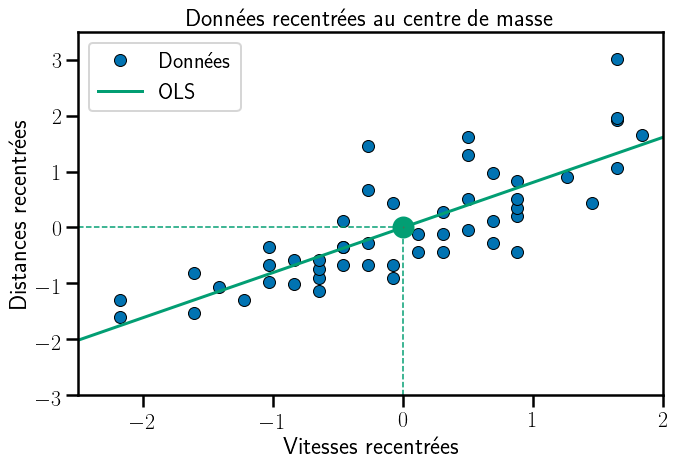

In [32]:
stdX = np.std(X)
stdY = np.std(y)

Z = (X - np.mean(X)) / stdX
yy = (y - np.mean(y)) / stdY
Z_to_predict = (X_to_predict - np.mean(X)) / stdX

skl_linmod_new = linear_model.LinearRegression(fit_intercept=False)
skl_linmod_new.fit(Z, yy)

fig = plt.figure(figsize=(10, 7))
plt.ylim(-3, 3.5)
plt.xlim(-2.5, 2)
plt.plot(Z, yy, 'o', label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)
plt.plot(Z_to_predict, skl_linmod_new.predict(Z_to_predict),
         color=my_orange, linewidth=3, label="OLS")
plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
plt.plot([-2.5, 0], [0, 0], color=my_orange, linewidth=1.5, linestyle="--")
plt.plot([0, 0], [-4, 0], color=my_orange, linewidth=1.5, linestyle="--")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title(r"Donn\'ees recentr\'ees au centre de masse")
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname,
                  "cars_data_plot_regression_gravity_recentered_rescaled",
                  imageformat)

# Compare standardization:

In [33]:
scaler = preprocessing.StandardScaler().fit(X)
Xarray = X.values
print(np.isclose(scaler.mean_, np.mean(Xarray)))
print(np.array_equal(scaler.var_[0], np.var(Xarray)))
print(np.array_equal(scaler.transform(X),
                     (Xarray - np.mean(Xarray)) / np.std(Xarray)))
print(np.array_equal(scaler.transform([[26]]),
                     ([[26]] - np.mean(Xarray)) / np.std(Xarray)))

[ True]
True
True
True


# Cas de deux variables:

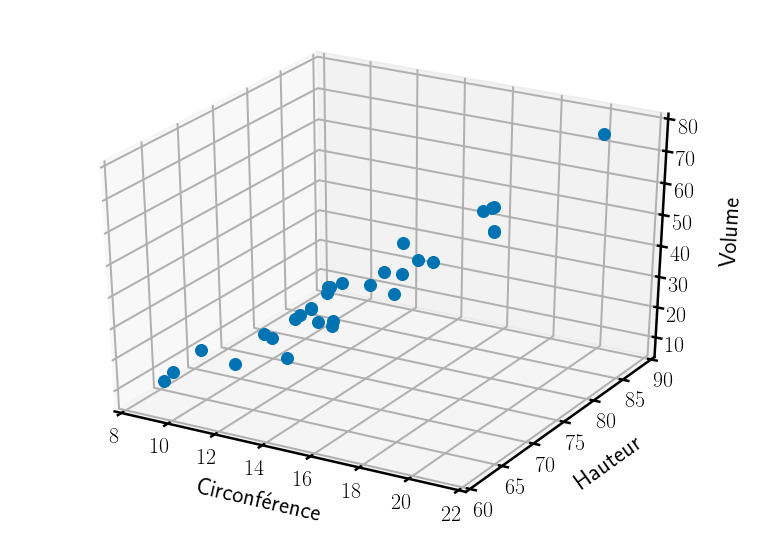

In [34]:
###############################################################################
# 3D case drawing
plt.close("all")
from mpl_toolkits.mplot3d import Axes3D

# Load data
url = 'http://vincentarelbundock.github.io/Rdatasets/csv/datasets/trees.csv'
dat3 = pd.read_csv(url)

# Fit regression model
X = dat3[['Girth', 'Height']]
X = sm.add_constant(X)
y = dat3['Volume']
results = sm.OLS(y, X).fit().params


XX = np.arange(8, 22, 0.5)
YY = np.arange(64, 90, 0.5)
xx, yy = np.meshgrid(XX, YY)
zz = results[0] + results[1] * xx + results[2] * yy


fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlim(8, 22)
ax.set_ylim(60, 90)
ax.set_zlim(5, 80)
ax.set_xlabel(r'Circonf\'erence')
ax.xaxis.labelpad=20
ax.yaxis.labelpad=20
ax.zaxis.labelpad=20
ax.set_ylabel(r'\ Hauteur',linespacing=5.2)
ax.set_zlabel(r'Volume',linespacing=5.2)
ax.plot(X['Girth'], X['Height'], y, 'o')
plt.show()
my_saving_display(fig, dirname, "tree_data", imageformat)


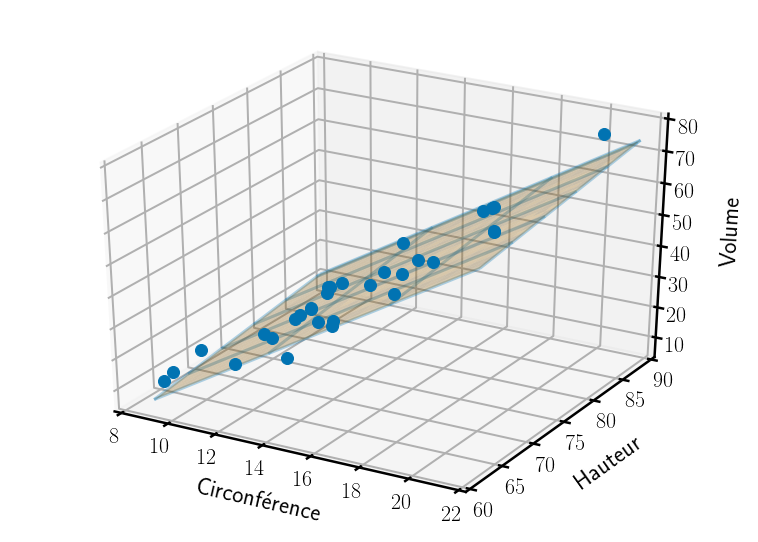

In [35]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlim(8, 22)
ax.set_ylim(60, 90)
ax.set_zlim(5, 80)
ax.plot(X['Girth'], X['Height'], y, 'o')
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10, alpha=0.3)
ax.plot_surface(xx, yy, zz, alpha=0.3)
# ax.set_xlabel(r'\vspace{1.6cm} \phantom{fwefwe}\vspace{1.6cm}' + r'Circonference')
ax.set_xlabel(r'Circonf\'erence')
ax.set_ylabel('Hauteur')
ax.set_zlabel('Volume')
ax.xaxis.labelpad=20
ax.yaxis.labelpad=20
ax.zaxis.labelpad=20
my_saving_display(fig, dirname, "tree_data_plot_regression", imageformat)
plt.show()
